In [230]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [235]:
preDF = pd.read_csv('daily_crime_during_PRE-COVID.csv', usecols = range(1,23))
postDF = pd.read_csv('daily_crime_during_COVID.csv', usecols = range(1,25))
['covid_daily_case_count', 'covid_deaths']
preDF['year'] = pd.DatetimeIndex(preDF['date']).year
preDF['month'] = pd.DatetimeIndex(preDF['date']).month
preDF['day'] = pd.DatetimeIndex(preDF['date']).day
#preDF['covid_daily_case_count'] = 0
#preDF['covid_deaths'] = 0
postDF['year'] = pd.DatetimeIndex(postDF['date']).year
postDF['month'] = pd.DatetimeIndex(postDF['date']).month
postDF['day'] = pd.DatetimeIndex(postDF['date']).day
preDF = preDF.drop(columns = 'date')
postDF = postDF.drop(columns = 'date')

In [236]:
preX = preDF.loc[:, preDF.columns != 'daily_crime_count'].values
preY = preDF['daily_crime_count'].values


#pre_x_train, pre_x_test, pre_y_train, pre_y_test = train_test_split(x, y, test_size = .2, random_state = 12345)

In [237]:
postX = postDF.loc[:, postDF.columns != 'daily_crime_count'].values
postY = postDF['daily_crime_count'].values


#post_x_train, post_x_test, post_y_train, post_y_test = train_test_split(x, y, test_size = .2, random_state = 12345)

In [238]:
preclf = RandomForestRegressor(n_estimators = 2000, max_depth = 5)
postclf = RandomForestRegressor(n_estimators = 2000, max_depth = 5)

preclf.fit(preX, preY.ravel())
postclf.fit(postX, postY.ravel())
#preclf.fit(pre_x_train, pre_y_train.ravel())
#postclf.fit(post_x_train, post_y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=2000)

# Pre Importances

<AxesSubplot:>

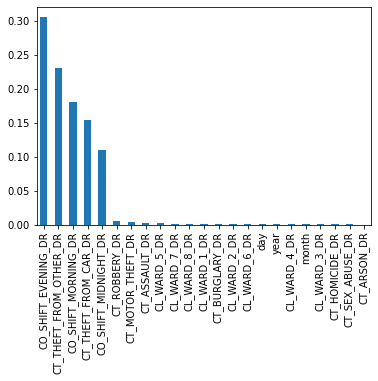

In [239]:
importance = pd.Series(preclf.feature_importances_, index = preDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [240]:
importance

CO_SHIFT_EVENING_DR       3.050144e-01
CT_THEFT_FROM_OTHER_DR    2.305568e-01
CO_SHIFT_MORNING_DR       1.804125e-01
CT_THEFT_FROM_CAR_DR      1.536656e-01
CO_SHIFT_MIDNIGHT_DR      1.093170e-01
CT_ROBBERY_DR             4.564675e-03
CT_MOTOR_THEFT_DR         3.838616e-03
CT_ASSAULT_DR             2.320379e-03
CL_WARD_5_DR              2.179849e-03
CL_WARD_7_DR              1.516016e-03
CL_WARD_8_DR              1.424466e-03
CL_WARD_1_DR              1.205841e-03
CT_BURGLARY_DR            9.418820e-04
CL_WARD_2_DR              8.511091e-04
CL_WARD_6_DR              5.728247e-04
day                       3.931787e-04
year                      3.847406e-04
CL_WARD_4_DR              3.077527e-04
month                     1.846400e-04
CL_WARD_3_DR              1.569250e-04
CT_HOMICIDE_DR            1.010445e-04
CT_SEX_ABUSE_DR           8.940067e-05
CT_ARSON_DR               2.244971e-07
dtype: float64

# Post importances

<AxesSubplot:>

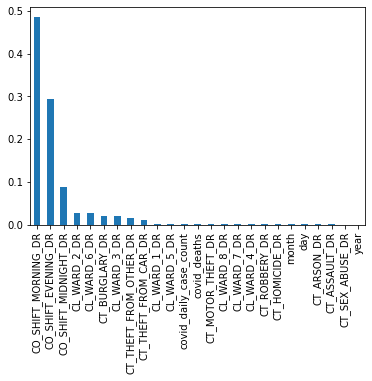

In [241]:
importance = pd.Series(postclf.feature_importances_, index = postDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [242]:
importance

CO_SHIFT_MORNING_DR       0.484521
CO_SHIFT_EVENING_DR       0.293132
CO_SHIFT_MIDNIGHT_DR      0.087877
CL_WARD_2_DR              0.026319
CL_WARD_6_DR              0.025893
CT_BURGLARY_DR            0.020468
CL_WARD_3_DR              0.020183
CT_THEFT_FROM_OTHER_DR    0.016222
CT_THEFT_FROM_CAR_DR      0.010497
CL_WARD_1_DR              0.002187
CL_WARD_5_DR              0.001959
covid_daily_case_count    0.001933
covid_deaths              0.001625
CT_MOTOR_THEFT_DR         0.001125
CL_WARD_8_DR              0.001064
CL_WARD_7_DR              0.000902
CL_WARD_4_DR              0.000690
CT_ROBBERY_DR             0.000684
CT_HOMICIDE_DR            0.000646
month                     0.000631
day                       0.000525
CT_ARSON_DR               0.000487
CT_ASSAULT_DR             0.000365
CT_SEX_ABUSE_DR           0.000053
year                      0.000012
dtype: float64